### Importing Libraries

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Load _ DataSet

In [2]:
diabetes_df =pd.read_csv(r"C:\Users\ragha\OneDrive\Desktop\DS_CareeR\NuCoT_TraininG\noTES\Machine Learning\Supervised Learning\Classification\diabetes.csv")

### Examine _ DataSet

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes_df['Outcome'].unique()

array([1, 0], dtype=int64)

### Data _ PreprocessinG

In [9]:
X = diabetes_df.drop(['Outcome'],axis=1)
Y = diabetes_df[['Outcome']]

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [27]:
# Print the shapes of training and testing data arrays
print(f'shape of X_train = {X_train.shape},\nshape of X_test = {X_test.shape} ,\nshape of Y_train = {Y_train.shape},\nshape of Y_test = {Y_test.shape}')

shape of X_train = (614, 8),
shape of X_test = (154, 8) ,
shape of Y_train = (614, 1),
shape of Y_test = (154, 1)


### Decision_Tree - CLassifier 

In [28]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
Y_pred = model.predict(X_test)
Y_pred.shape

(154,)

In [30]:
print(f'Actual_Values of Y_test : \n {Y_test}')

Actual_Values of Y_test : 
      Outcome
471        0
85         0
69         0
667        1
284        1
..       ...
620        0
445        1
263        0
227        1
409        1

[154 rows x 1 columns]


In [31]:
print(f'Predicted Values of Y_test : \n {Y_pred}')

Predicted Values of Y_test : 
 [1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1
 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 1]


### Model _ Evaluation

In [32]:
print('Accuracy_of_Model :', model.score(X_test,Y_test))

Accuracy_of_Model : 0.7337662337662337


In [33]:
c
print(f'confusion _ matrix : \n {confusion_matrix(Y_pred,Y_test)} ')

confusion _ matrix : 
 [[80 18]
 [23 33]] 


In [34]:
print(f'classification report :\n\n {classification_report(Y_pred,Y_test)}')

classification report :

               precision    recall  f1-score   support

           0       0.78      0.82      0.80        98
           1       0.65      0.59      0.62        56

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



Text(50.722222222222214, 0.5, 'actual')

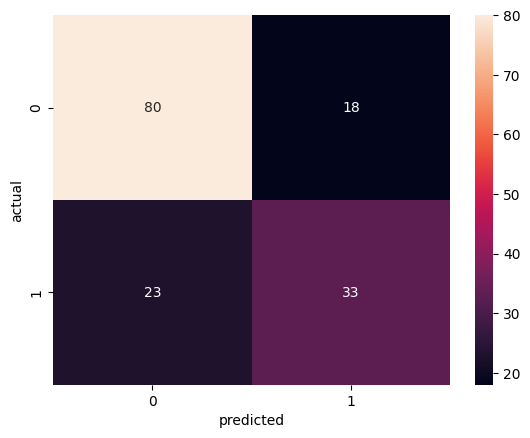

In [37]:
cm = confusion_matrix(Y_pred,Y_test)
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')